### Factors that affect the Borrower APR
by Nwajagu Irene

### Investigation Overview
In this investigation, I will be looking at the factors that affect the borrower APR. The main focus will be the borrower rate,Loan status and the Employment Status.


### Dataset Overview
This dataset contains 113,937 loans with 81 variables on each loans, including loan amount, borrower rate, current loan status, borrower income,term, employmentstatus, occupation among others. The prosper loan data dataset was provided by Udacity.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px 

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
loan_data.duplicated().value_counts()

False    113937
dtype: int64

In [4]:
# Selecting 17 features for visualization.
loandata_new = loan_data[['LoanKey','Term','LoanStatus','BorrowerAPR','BorrowerRate','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome','MonthlyLoanPayment',
       'IncomeVerifiable']]

In [5]:
# Check for duplicates
loandata_new.duplicated().value_counts()

False    113066
True        871
dtype: int64

In [6]:
# Remove duplicates
loandata_new2=loandata_new.drop_duplicates()

In [7]:
# Check if the duplicates have been dropped
loandata_new2.duplicated().value_counts()

False    113066
dtype: int64

In [8]:
# Check for missing values
loandata_new2.isnull()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113933,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113934,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
loandata_new2.shape

(113066, 17)

### Borrower APR of Distribution
The BorrowerAPR distribution looks multimodal. it showed small peak centered at 0.1, a large peak centered at 0.2. There is also a small peak centered 0.3. Additionally, there is a very sharp peak between 0.35 and 0.36. Only very few loans have APR greater than 0.43.



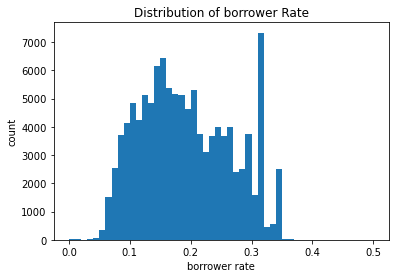

In [10]:
bins = np.arange(0,loandata_new2['BorrowerRate'].max()+0.01,0.01) 
plt.hist(x='BorrowerRate',data=loandata_new2,bins=bins)
plt.title('Distribution of borrower Rate')
plt.xlabel('borrower rate')
plt.ylabel('count');

In [14]:
# Select outliers in debt to income ratio with ratio greater than 1.
dti_outliers = (loandata_new2['DebtToIncomeRatio']>1)

In [15]:
out_df = loandata_new2.loc[dti_outliers,:]

In [16]:
#Removing outlier from our data.
filter_loandata = loandata_new2.loc[-dti_outliers,:]

In [17]:
loandata_df = filter_loandata.reset_index()

In [18]:
# Dropping index.
loandata_df=loandata_df.drop('index',axis=1)


### Heat Map Of Numeric Variable

Borrower APR is highly correlated with Borrower Rate.If borrower rate increases borrower APR will also increase and vice-versa. There is a moderate correlation between investors and Loan original amount. It is strange that debt to income ratio is very low correlated with every other variable. It could be due to not including large number of features from main dataframe 'df'. But I will try to explore this feature with categorical variables. Also, if we look at the DTI (debt to income ratio) graph (pairplot) and compare it with the graphs of borrower APR and borrower Rate, we can observe that their is some correlation between these variables. There seem to be some outliers present in credit score range upper and credit score range lower variables. I will remove them and then again plot the pairgrid to see the correlation. There is moderate negative correlation between loan original amount and Borrower APR, Borrower Rate variables.

In [12]:
# Making a list of all numerical variables.
numeric_var = ['Term','BorrowerAPR','BorrowerRate','LoanOriginalAmount','CreditScoreRangeLower','CreditScoreRangeUpper','DebtToIncomeRatio','Investors','StatedMonthlyIncome']
categoric_vars = ['cut', 'color', 'clarity']

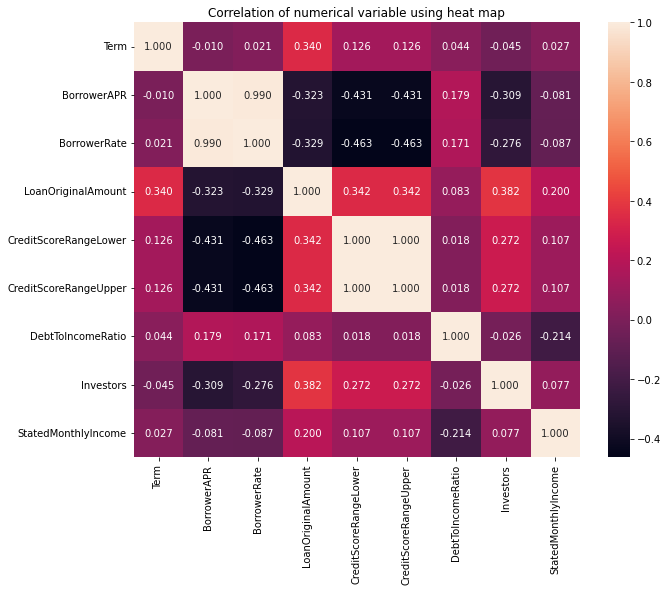

In [19]:
# Plotting a heat map to show the correlation of each numerical variable.
plt.figure(figsize=(10,8))
sb.heatmap(data=loandata_df[numeric_var].corr(),annot=True,fmt='.3f')
plt.title('Correlation of numerical variable using heat map');

### Borrower APR and Borrower rate

Borrower Rate is highly proportional with borrower APR. This means that if we increase Borrower APR then Borrower Rate will also increase and vice-versa. Maximum borrowers have APR and Rate between 0.1 and 0.2.(see dark portion) Between 0.05 and 0.2, count of borrower APR and borrower Rate increases. Between 0.2 and 0.35 count of borrower APR and rate decreases.

In [20]:
for lab in ['BorrowerAPR','BorrowerRate']:
    bins = np.arange(0,loandata_df[lab].max()+0.04,0.04)
    bins = [round(x,2) for x in bins]
    loandata_df[f'{lab} cat'] = pd.cut(x=loandata_df[lab],bins=bins,labels=bins[1:],include_lowest=False)

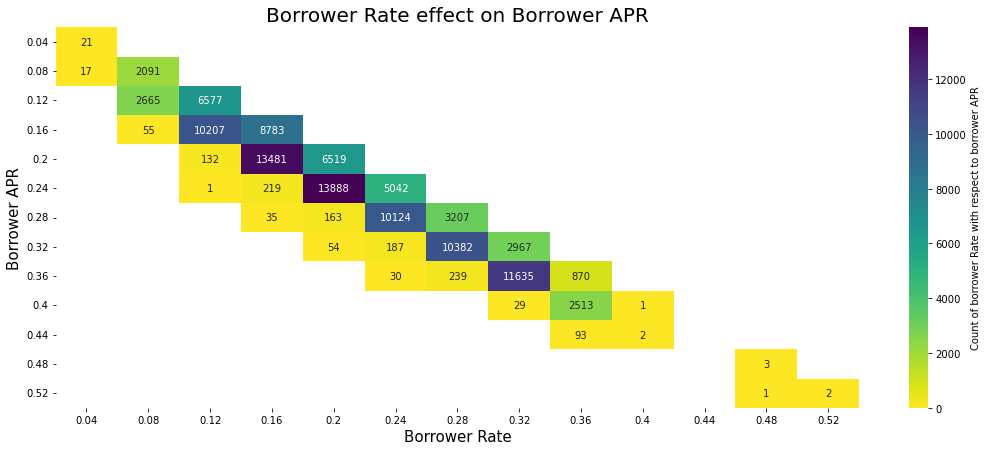

In [21]:
plt.figure(figsize=(18, 7))
sb.heatmap(loandata_df.groupby(['BorrowerAPR cat','BorrowerRate cat']).size().unstack('BorrowerRate cat').replace({0:np.nan}),annot=True,
           fmt='.0f',cmap='viridis_r',vmin=0,cbar_kws={'label':'Count of borrower Rate with respect to borrower APR'})
plt.title('Borrower Rate effect on Borrower APR',fontdict={'size':20})
plt.xlabel('Borrower Rate',fontdict={'size':15})
plt.ylabel('Borrower APR',fontdict={'size':15})
plt.yticks(rotation=0)
plt.show();

### Loan Status with Borrower APR and Borrower Rate.

Out of all loan status, 'completed' and 'current' status are the only ones with maximum count of APR and rate less than or equal to 0.2. 

Rest of the loan status have a 'cloud' of points above 0.2 for both APR and Rate except 'cancelled' status as it has only one record in our data. 

If borrower APR and rate are high than loan status is more likely to be anything except 'current' and 'completed'



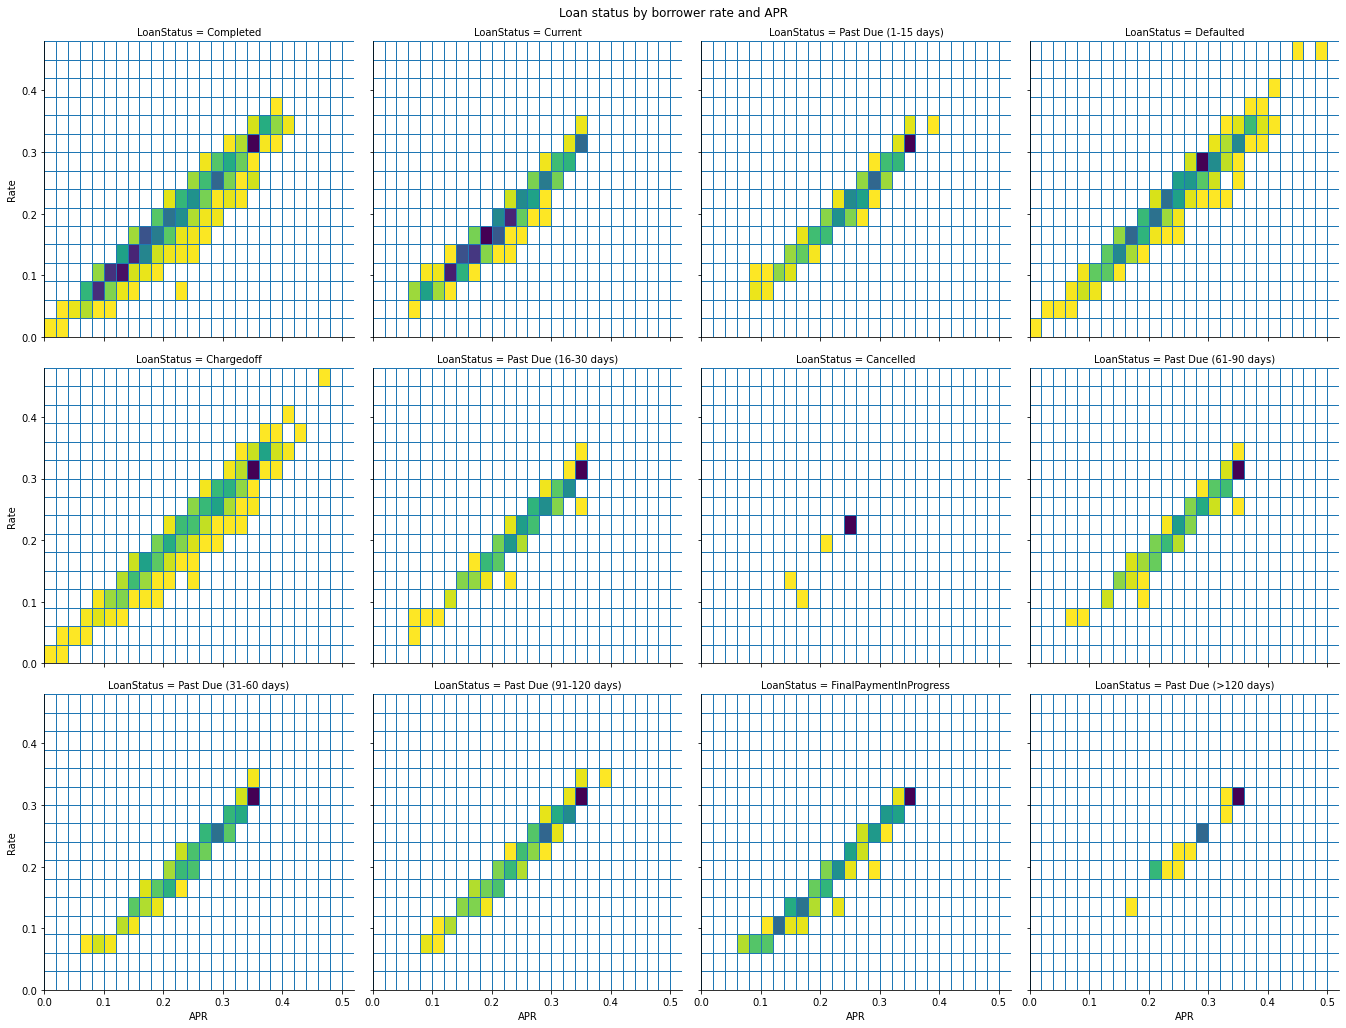

In [22]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,loandata_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loandata_df['BorrowerRate'].max()+0.01,0.03)
g = sb.FacetGrid(data = loandata_df, col = 'LoanStatus', col_wrap = 4, height = 4.7)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Loan status by borrower rate and APR',y=1.01)

plt.show()


### Employment status and Borrower APR and Borrower Rate.

Most of the data with the status 'Not Employed' had low APR and low rate (below 0.2).

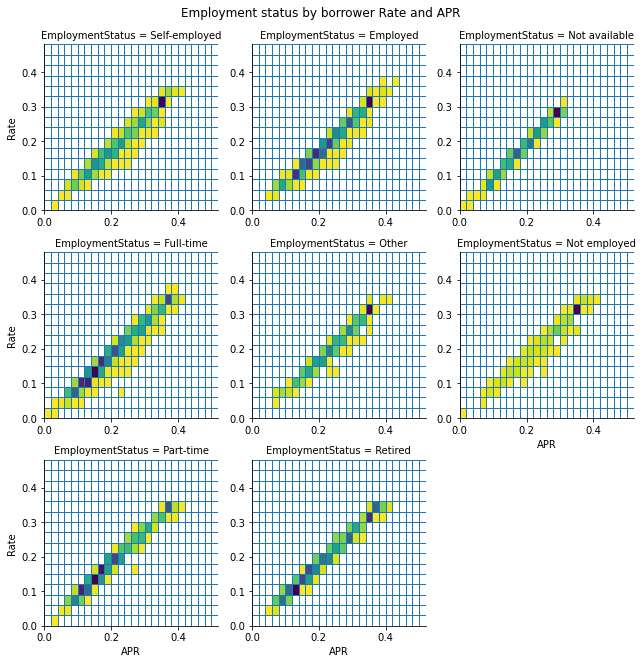

In [23]:
bins_x = np.arange(0,loandata_df['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,loandata_df['BorrowerRate'].max()+0.01,0.03)
g = sb.FacetGrid(data = loandata_df, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)
g.set_xlabels('APR')
g.set_ylabels('Rate')
g.fig.suptitle('Employment status by borrower Rate and APR',y=1.02)
plt.show()

In [ ]:
!jupyter nbconvert <Slide_deck>.ipynb --to slides --post serve --no-input --no-prompt